## Data Extraction and Return Computation

This notebook retrieves historical SPY price data from Yahoo Finance,
computes daily log returns, and provides initial statistical and visual
analysis to support subsequent Monte Carlo simulations.


I / Data extraction & return analysis

In [63]:
pip install yfinance

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

plt.style.use("seaborn-v0_8") # C'est juste pour avoir des graphiques plus beaux avec matplotlib


In [65]:
ticker = "SPY"
data = yf.download(ticker,start="2024-01-01",end="2026-01-01")
data.head()

C:\Users\marve\AppData\Local\Temp\ipykernel_26264\1809575469.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,start="2024-01-01",end="2026-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2024-01-02,461.247467,462.242879,459.139573,460.769298,123623700
2024-01-03,457.480560,459.822655,456.875522,459.080980,103585900
2024-01-04,456.006958,459.598172,455.782496,457.002340,84232200
2024-01-05,456.631592,459.090787,455.177517,456.211943,86118900
2024-01-08,463.150421,463.296796,457.002389,457.129257,74879100


In [66]:
prices = data["Close"].dropna() # Le Close est déjà ajusté en prenant compte des dividendes et splits
prices.name = "SPY"
prices.tail()

Ticker,SPY
Date,
2025-12-24,690.380005
2025-12-26,690.309998
2025-12-29,687.849976
2025-12-30,687.010010
2025-12-31,681.919983


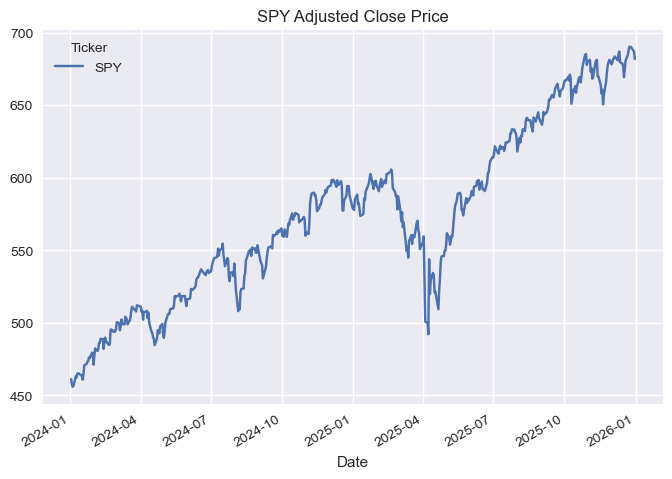

In [67]:
# Visualisation de l'évolution du prix sur 2ans
prices.plot(title="SPY Adjusted Close Price")
plt.show()


In [68]:
returns = np.log(prices / prices.shift(1)).dropna() # prices.shift(1) permet d'obtenir le prix de la veille
# On utilise le logarithme car on pourra utiliser la somme des variations relatives
returns.describe()

Ticker,SPY
count,501.000000
mean,0.000780
std,0.010261
min,-0.060327
25%,-0.003111
50%,0.001103
75%,0.005750
max,0.099863


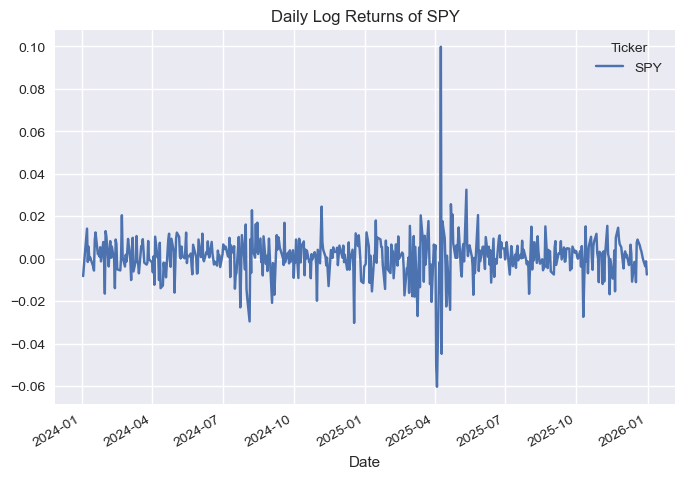

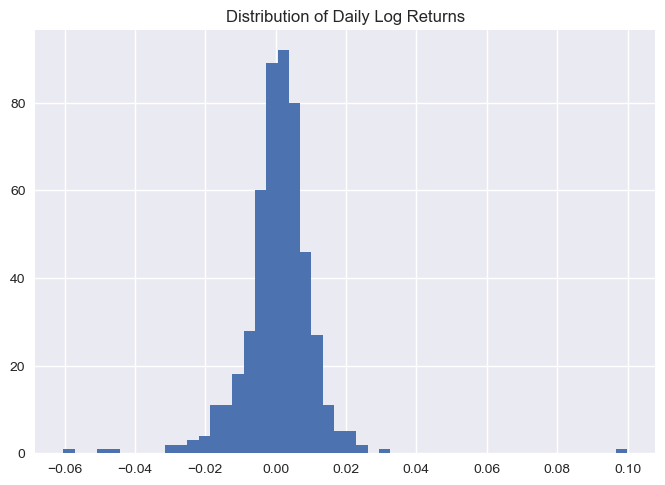

In [69]:
returns.plot(title="Daily Log Returns of SPY")
plt.show()

returns.hist(bins=50)
plt.title("Distribution of Daily Log Returns")
plt.show()

In [70]:
# Sauvegarde des prix
prices.to_csv("C:/Users/marve/OneDrive/Documents/Projets_Finance/MonteCarlo-SPY/data/spy_prices.csv")

# Sauvegarde des rendements journaliers
returns.to_csv("C:/Users/marve/OneDrive/Documents/Projets_Finance/MonteCarlo-SPY/data/spy_returns.csv")


II / Yields & First statistics

In [71]:
# returns contient les rendements log journaliers

# Moyenne et volatilité journalière
mean_daily = returns.mean()[0]  
vol_daily = returns.std()[0] # la volatilité correspond à l’écart-type des log-returns journaliers 

# Volatilité annualisée
vol_annual = vol_daily * np.sqrt(252)  # 252 jours de trading

print("Moyenne journalière:", mean_daily)
print("Volatilité journalière:", vol_daily)
print("Volatilité annualisée:", vol_annual)


Moyenne journalière: 0.0007803944511361818
Volatilité journalière: 0.010261148682837442
Volatilité annualisée: 0.16289068548387517


C:\Users\marve\AppData\Local\Temp\ipykernel_26264\1829665685.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_daily = returns.mean()[0]  # [0] car returns est DataFrame avec une seule colonne
C:\Users\marve\AppData\Local\Temp\ipykernel_26264\1829665685.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vol_daily = returns.std()[0]


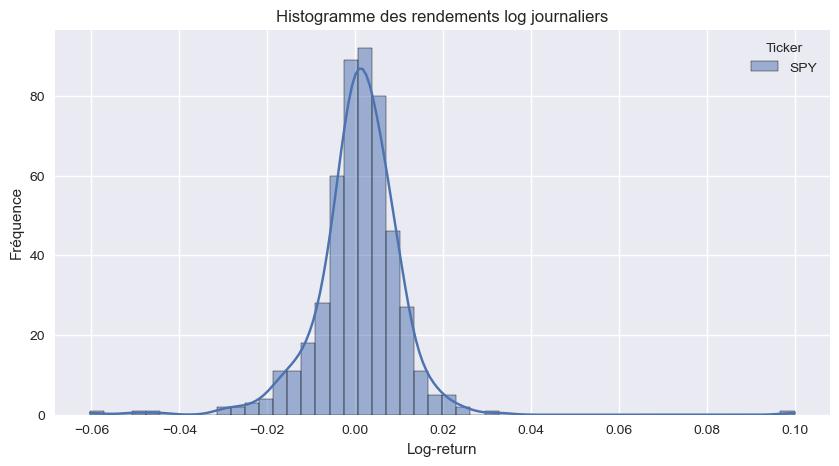

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(returns, bins=50, kde=True)
plt.title("Histogramme des rendements log journaliers")
plt.xlabel("Log-return")
plt.ylabel("Fréquence")
plt.show()


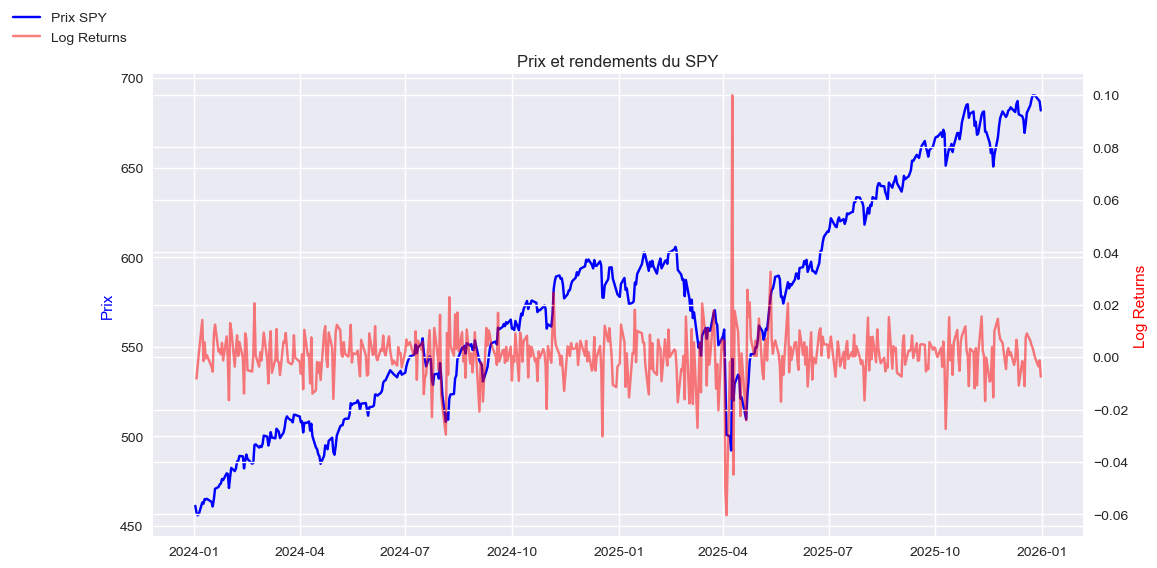

In [88]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Prix en bleu
ax1.plot(prices, color='blue', label='Prix SPY')
ax1.set_ylabel("Prix", color='blue')

# Rendements sur axe secondaire
ax2 = ax1.twinx()
ax2.plot(returns, color='red', alpha=0.5, label='Log Returns')
ax2.set_ylabel("Log Returns", color='red')

plt.title("Prix et rendements du SPY")
fig.legend(loc="upper left")
plt.show()
